# Supervised Learning | Regression (Linear Regression)

Today's Outline:
- Intuition
- Full Case-study

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# sns.set()

==========

## Simple Linear Regresssion | Intuition (Fuel Consumption)

Scikit-Learn Linear Module: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

OLS Demo: https://www.geogebra.org/m/h7zw5jCG

### Importing & Creating Dataset

In [2]:
fuel = pd.read_csv('fuel.csv')
fuel

,Horse Power,Fuel Economy (MPG)
0,118.770799,29.344195
1,176.326567,24.695934
2,219.262465,23.952010
3,187.310009,23.384546
4,218.594340,23.426739
...,...,...
95,162.810542,27.418661
96,266.869640,15.989945
97,243.831211,19.253375
98,140.959803,29.515593


In [3]:
fuel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Horse Power         100 non-null    float64
 1   Fuel Economy (MPG)  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [4]:
fuel.describe().round(2)

,Horse Power,Fuel Economy (MPG)
count,100.00,100.00
mean,213.68,23.18
std,62.06,4.70
min,50.00,10.00
25%,175.00,20.44
50%,218.93,23.14
75%,251.71,26.09
max,350.00,35.00


### Exploring Data

C:\Users\Youssef\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


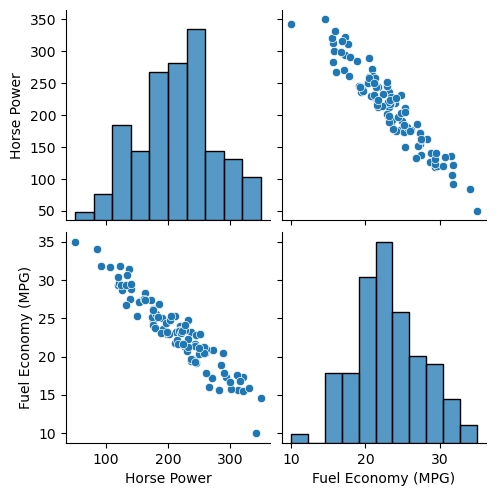

In [5]:
sns.pairplot(fuel)

<Axes: xlabel='Horse Power', ylabel='Fuel Economy (MPG)'>

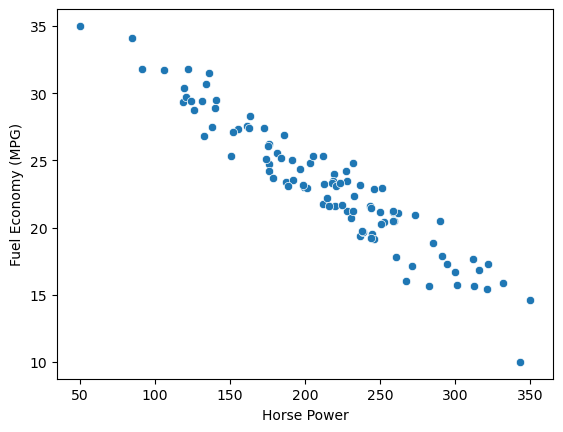

In [6]:
sns.scatterplot(data = fuel, x = 'Horse Power', y = 'Fuel Economy (MPG)')

<Axes: xlabel='Horse Power', ylabel='Fuel Economy (MPG)'>

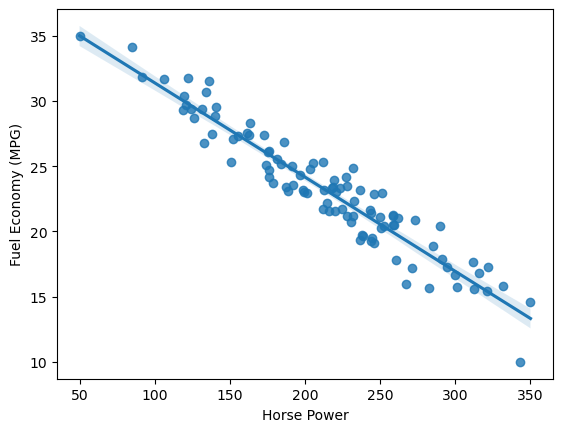

In [7]:
sns.regplot(x = 'Horse Power', y =  'Fuel Economy (MPG)', data = fuel)

### Splitting Data

In [8]:
X = fuel[['Horse Power']]
y = fuel['Fuel Economy (MPG)']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

### Model Training & Building 

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
reg = LinearRegression()

In [12]:
reg.fit(X_train, y_train)

LinearRegression()

In [13]:
reg.coef_ #b1

array([-0.07339921])

In [14]:
reg.intercept_ #bo node

38.83741765176062

### Model Evaluation & Prediction

In [15]:
reg.predict([[300]])

C:\Users\Youssef\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([16.81765416])

In [16]:
y_pred = reg.predict(X_test)
y_pred

array([26.84763187, 24.03819444, 24.76570149, 23.22254597, 22.68235496,
       20.30027164, 15.27984103, 26.07040895, 21.77577473, 25.54717406,
       21.81945065, 14.4910023 , 13.14769357, 19.24939649, 26.88725225,
       15.65666225, 19.85198653, 25.96694567, 16.85211819, 18.09448876,
       25.18222504, 30.06352118, 21.39240057, 27.43005219, 35.16745707,
       24.22013801, 21.48111351, 19.86928339, 15.21456018, 20.79439361])

In [17]:
y_test.values

array([28.28951641, 22.93765296, 23.55672887, 23.20474499, 21.58264283,
       20.40757083, 15.44171107, 25.12965002, 22.3130506 , 25.57508399,
       24.82982394, 15.83796845, 14.58907857, 15.98994481, 27.41866055,
       16.8311881 , 20.4706756 , 26.05708471, 16.69336865, 15.67631564,
       26.89706687, 30.39261331, 19.72346154, 27.29492955, 35.        ,
       23.01119391, 19.36733689, 21.16734325, 17.30062804, 22.84971109])

In [18]:
reg.score(X,y) #R2 m3naha en x btwsf y bnsbt 90%

0.9092814954846251

In [19]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred)) #eli bhsb mnha el r squared eli bahsb mnha el variation w ezay x btwsf y deh zy eli fo2eha bs deh ahm 34an dah el predicition w el egaba el nmozgya fa el test dah ahm w aal haga ya3ni 40% 

0.9155925018028517


Text(0.5, 1.0, 'HP vs. MPG (Testing Set)')

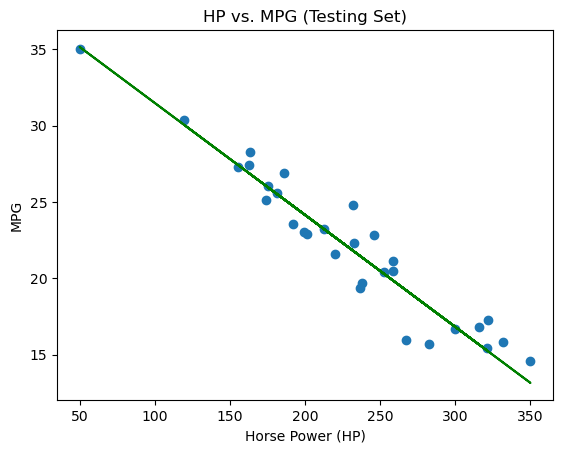

In [20]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color = 'g')
plt.xlabel('Horse Power (HP)')
plt.ylabel('MPG')
plt.title('HP vs. MPG (Testing Set)')

==========

## Multiple Linear Regression (MLR) | Full Case-study (Start-Ups)

### Importing Dataset & Extracting Features

In [21]:
startups = pd.read_csv('startups.csv')
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [22]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [23]:
startups.describe().round(2)

,R&D Spend,Administration,Marketing Spend,Profit
count,50.00,50.00,50.00,50.00
mean,73721.62,121344.64,211025.10,112012.64
std,45902.26,28017.80,122290.31,40306.18
min,0.00,51283.14,0.00,14681.40
25%,39936.37,103730.88,129300.13,90138.90
50%,73051.08,122699.80,212716.24,107978.19
75%,101602.80,144842.18,299469.08,139765.98
max,165349.20,182645.56,471784.10,192261.83


### Exploring Data

C:\Users\Youssef\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


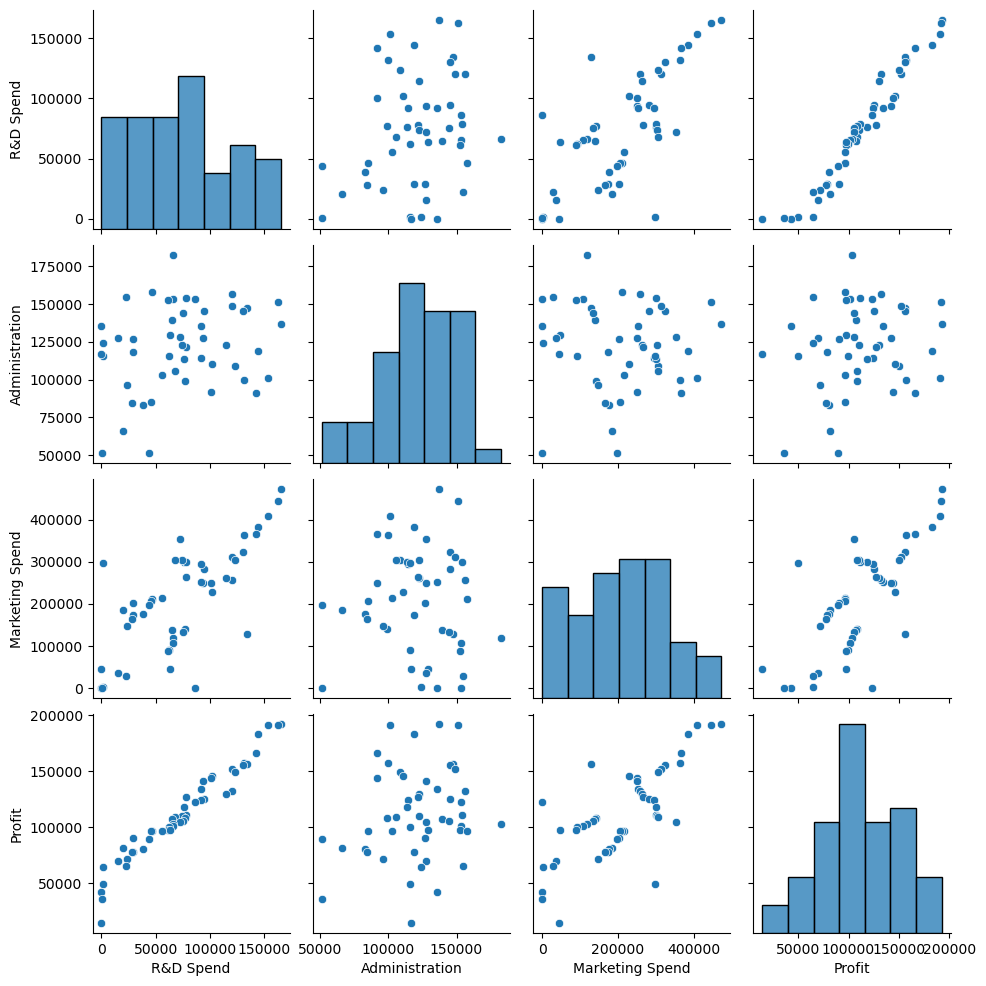

In [24]:
sns.pairplot(startups) # el qym linear fa bafhm mnha enha mo2thra aktr fa a7sb mnha qymt el corelation

### Data Splitting & Preprocessing

In [26]:
X = startups.iloc[:, :-1].values
y = startups.iloc[:, -1].values

In [27]:
from sklearn.compose import ColumnTransformer #34an 3ndi el state mohm w 3ayz ad5lo fe el ml fa b5leh encodeeing numerical
from sklearn.preprocessing import OneHotEncoder

In [28]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [29]:
X

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Model Training & Building

In [31]:
from sklearn.linear_model import LinearRegression #hoa brdo simple w multiple

In [32]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [35]:
reg.coef_ # b290 6 leh homa m4 4 34an el categroical data lma fakenaha b2o 0 w 1

array([ 8.66383692e+01, -8.72645791e+02,  7.86007422e+02,  7.73467193e-01,
        3.28845975e-02,  3.66100259e-02])

In [36]:
reg.intercept_

42467.52924853696

### Model Evaluation

In [37]:
reg.predict([[0.0, 0.0, 1.0, 150000, 130000, 450]]) #0 0 1 deh newyork deh qymt el profit based 3la eli d5ltholo dah

array([163565.08777148])

In [38]:
y_pred = reg.predict(X_test)
y_pred

array([103015.20159794, 132582.27760815, 132447.73845174,  71976.09851258,
       178537.48221057, 116161.24230168,  67851.69209677,  98791.73374686,
       113969.43533014, 167921.06569552])

In [39]:
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [40]:
from sklearn.metrics import r2_score #34an aa2es el predict kwes bnsbt ad ehh

In [41]:
r2_score(y_test, y_pred) #accuracy b 93%

0.9347068473282364

In [42]:
reg.score(X,y)

0.948522354717155

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [44]:
print(mean_absolute_error(y_test, y_pred))

7514.293659644146


In [45]:
print(mean_squared_error(y_test, y_pred))

83502864.03258514


In [46]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

9137.99015279537


In [47]:
y.mean() #bqarn el tlat qym eli tl3o fo2 dool w bqarnhom blmean nfso 

112012.63920000002

In [48]:
y_test.mean()

122277.407

In [49]:
#ana bhsb mtwst el error 3ndi bdl ma aro7 3nd no2ta no2ta h7sb el error 3ndha fa mtwst el errors eli ana wsltlha 9 tlaf fa 2ol 
#msln 10k bdl 9k fa mtwst el error eli hytl3 3ndi 10k mn 112k ya3ni msln nsbt error fe 7dod 10% nsbt error fe 7dod 10%

==========

# THANK YOU!